<a href="https://colab.research.google.com/github/Engineer-Gustavo-Softworks/TRABALHANDO-COM-DADOS-09/blob/main/%C3%81rvores_de_Decis%C3%A3o_e_Random_Forest_Resolvido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 01 - Manipulando árvores

Em computação,  **árvore** sempre foi um nome que causa medo até no mais empenhado aluno (e com razão). Embora seja uma estrutura que possa trazer diversas complexidades, ela é muito poderosa! Não é a toa que fizeram um algoritmo de aprendizagem de máquinas com ela.

Para entender como elas funcionam, vamos ao exemplo:

## O famigerado dataset das flores

O dataset IRIS é um dos mais famosos datasets usados em aulas, devido ele ser:
- Pequeno
- Balanceado
- Fácil de entender
- Fácil de manipular

Vamos dar uma olhada nele:

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["label"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Para trabalhar com esse dataset, não precisamos fazer nada! Basta dividir em treino e teste e mandar para o modelo!

## Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

tree_model.fit(iris.data, iris.target)
print("Acurácia: ", tree_model.score(iris.data, iris.target))

Acurácia:  1.0


Wow! Como assim, um modelo com 100% de acurácia? Como isso é possível?

Uma coisa interessante das árvores de decisão é que podemos *vizualizá-las*, o que nos ajuda a entender como funcionam E o que elas aprenderam

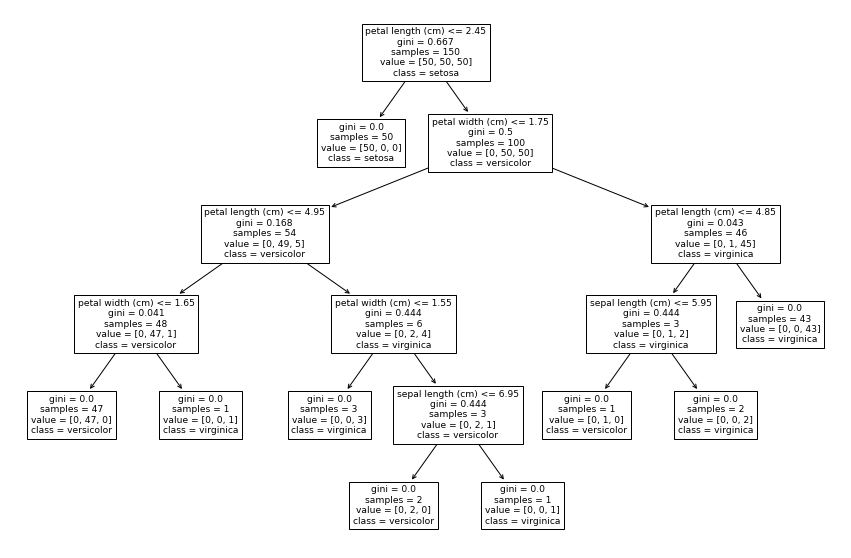

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,10))
tree.plot_tree(tree_model, feature_names=iris.feature_names, class_names=iris.target_names);

### Entendendo a árvore de decisão

A estrutura da árvore de decisão é simples: Cada nó da árvore (as caixinhas) representa uma condição, verificando se um atributo é maior ou não que um certo valor. Essa checagem é utilizada para **dividir** os dados. Caso a checagem passe, prosseguimos para a esquerda. Caso não, para a direita.

Vamos supor que tenhamos uma certa flor X e queremos saber o tipo da flor. A árvore vai seguir os seguintes passos, começando da raiz (o nó mais acima):

1. Verificar se o `petal width` é menor que 0.8. Se sim, ele vai para o nó da esquerda. Se não, para a direita.

2. O processo se repete até que ele chegue a um nó folha, ou seja, um nó que não tem mais para onde ir.

3. Ao chegar no nó folha, ele não verifica nada. Apenas atribui a classe do nó.

Algumas perguntas para trabalhar o raciocínio de vocês:

- Cada atributo é verificado apenas uma vez?
- Qual seria o impacto de se a árvore tivesse um tamanho máximo?
- O que deve ser o atributo `values` presente nos nós?

### Variando a altura da árvore

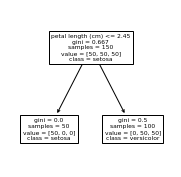

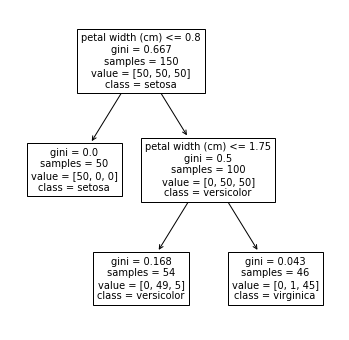

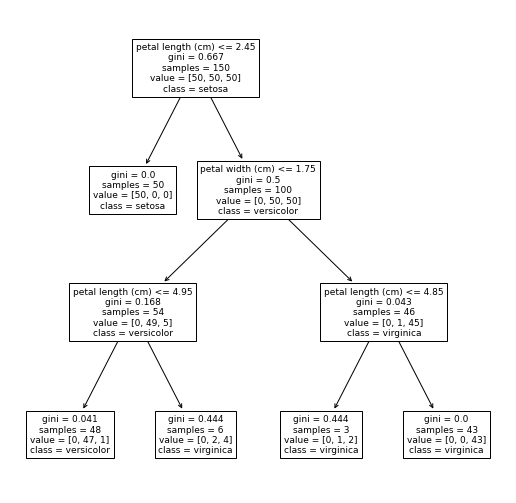

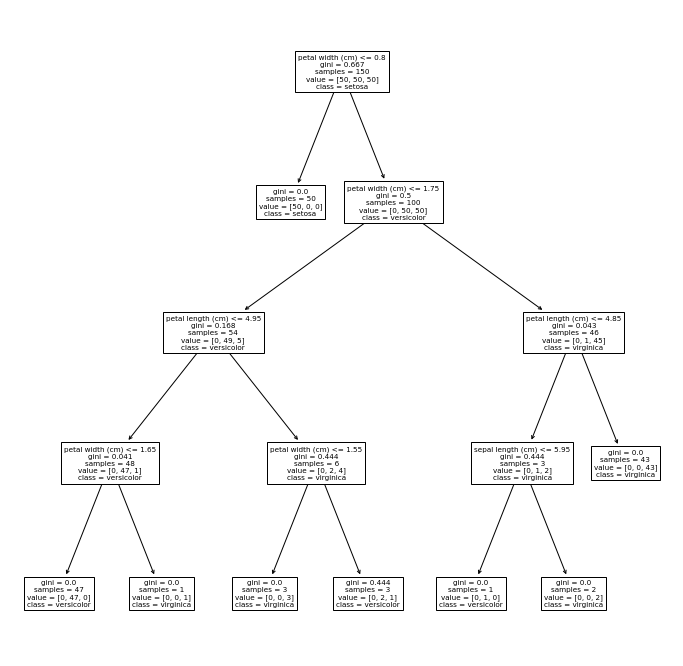

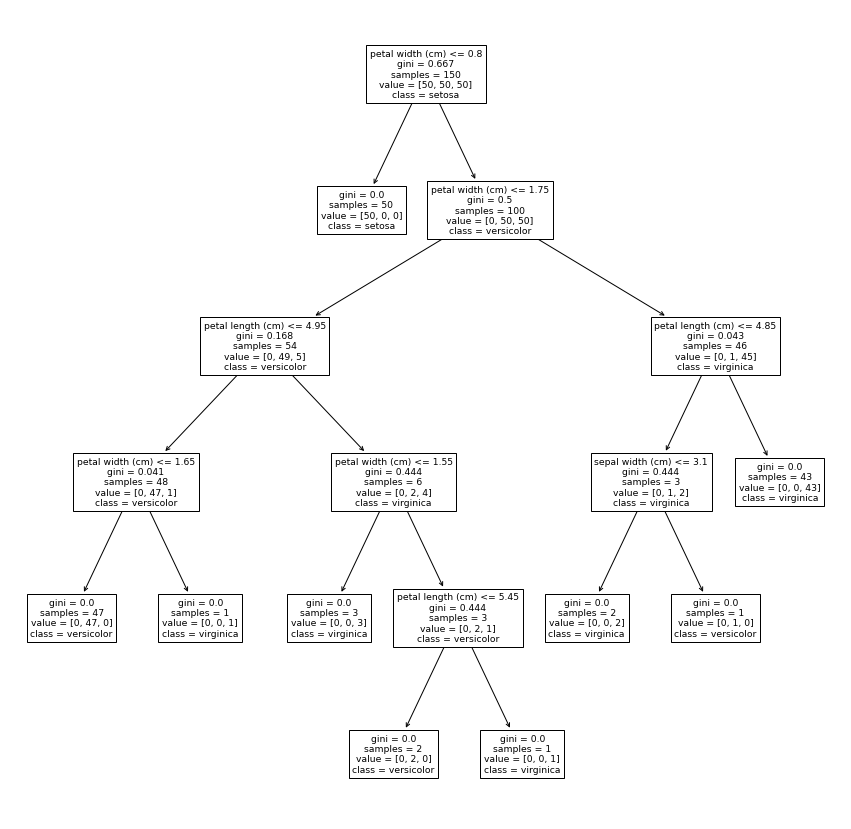

In [ ]:
for i in range(1,6):
  tree_model = DecisionTreeClassifier(max_depth=i)
  tree_model.fit(iris.data, iris.target)
  plt.figure(figsize=(3*i,3*i))
  tree.plot_tree(tree_model, feature_names=iris.feature_names, class_names=iris.target_names);

O que vocês notam que ocorre quando variamos a altura das árvores?

### Hiperparâmetros do modelo

Para a construção do nosso modelo, várias coisas podem ser levadas em consideração. Todas essas configurações definem como os dados serão dividios (ou seja, a criação das condições) e quantas vezes isso pode ocorrer. Alguns dos hiperparâmetros são:

- `criterion`, informando a função de medição da **qualidade** de uma divisão. Por padrão, é usado a função `gini`, que, para um nó $i$, em um problema de $N$ classes, é calculado da forma $G_i = 1 - \sum^N_{k=1} P_{i,k}^2$, onde $P_{i,k}$ é a proporção de elementos da classe $k$ no nó $i$. Dessa forma, um nó é mais *puro* de acordo com o quão menos elementos ele tem.

- `splitter`, definindo se, na hora de escolher quais divisões fazer, se será utilizada a melhor divisão (`best`) ou a melhor divisão aleatória (`random`)

- `max_depth`, definindo a altura máxima da árvore.

Obviamente existem vários outros hiperparâmetros, mas vai ficar como tarefa de casa pra vocês explorarem :)


#### Mas por que controlar a altura da árvore?

Vimos, no primeiro exemplo, que o modelo obteve uma acurácia de 100%!!!! Temos um modelo imbatível?

Na verdade, não. Primeiro, vale lembrar que nosso experimento **não é válido**. Lembram-se do proquê?

Segundamente, a árvore de decisão, basicamente, analisa todos os dados e, de certa forma, cria um conjunto *infalível* de condições, a partir dos dados de treino, permitindo que ele nunca erre! Isso é um excelente exemplo de ***overfitting***.

**Overfitting** é o nome que damos quando um modelo se ajusta *perfeitamente* aos dados de *treino*, mas performa de maneira péssima nos dados de teste. Isso é algo que sempre devemos evitar de acontecer (por isso que realizamos vários experimentos).

Todos os modelos existem formas de evitar isso. Regressão linear, por exemplo, possui o método de *regularização*, onde ela, de certa forma, *atrapalha* o ajuste dos pesos, permitindo que o modelo convirja mais devagar.

Uma das formas de alcançar isso com as árvores de decisão é limitando seu tamanho!

## Florestas aleatórias (ou *Random Forest*)

Se acabamos de falar de árvores de decisão e agora aparece um termo com *floresta*, fica um pouco óbvio o que vamos fazer aqui, certo?

Dependendo de como configuramos, uma árvore de decisão pode ser treinada e apresentar diversos resultados diferentes, cada um podendo aprender algo que outro não aprendeu. Existe um termo conhecico como *sabedoria da multidão*, onde perguntar algo a várias pessoas é melhor do que perguntar a uma só. Acho que vocês já entenderam a ideia, certo?

Uma *random forest* é um modelo de aprendizagem que combina várias árvores de decisão para poder realizar suas predições. Esse é um exemplo de um modelo de *ensemble learning*: um modelo que treina outros modelos para aprender.

Vamos ao exemplo:



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_model = RandomForestClassifier(n_estimators = 3, max_depth=3)
rnd_model.fit(iris.data, iris.target)

RandomForestClassifier(max_depth=3, n_estimators=3)

No código acima, criamos 3 árvores de decisão de tamanho máximo 3. Vamos ver os resultados:

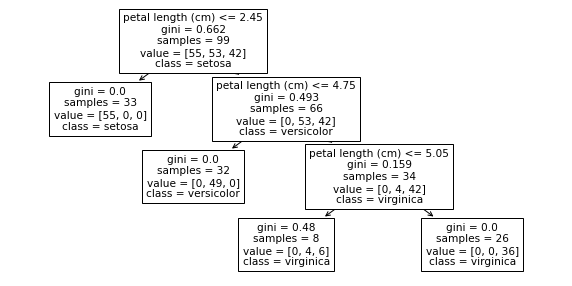

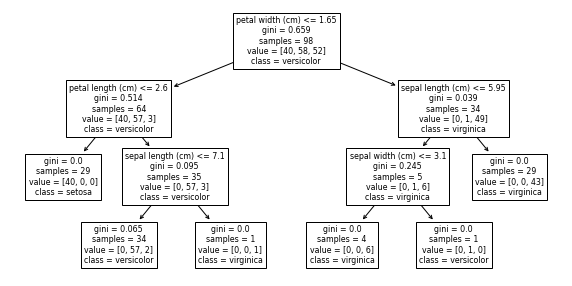

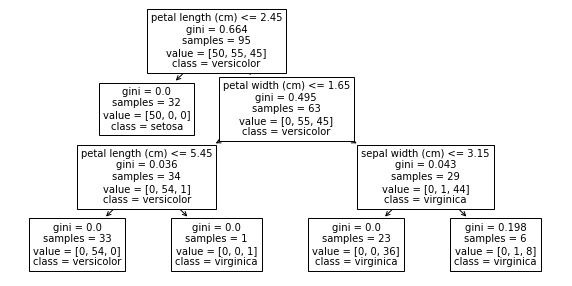

In [ ]:
# tree.plot_tree
for t in rnd_model.estimators_:
  plt.figure(figsize=(10,5))
  tree.plot_tree(t, feature_names=iris.feature_names, class_names=iris.target_names)


Cada árvore aprendeu uma coisa diferente, além do que nenhuma delas tem um nó folha com 100% de certeza (apenas uma classe naquele nó). Dessa forma, o nosso modelo pode utilizar o *aprendizado coletivo* para poder tomar duas decisões nas predições! Ao realziar uma predição, ele consulta o que os modelos previram e usa isso para computar sua própria predição.

Como vocês já devem ter imaginado, o modelo `RandomForest` pode receber (quase) todos os hiperparâmetros de `DecisionTree`, uma vez que ele precisa ser capaz de saber como as árvores são criadas. Além disso, ele também tem parâmetros próprios do *ensemble learning*, como, por exemplo, o número de modelos a serem treinados (`n_estimators`).

## Exercícios

A partir do que vocês aprenderam até agora, vocês precisam executar as tarefas abaixo.

**OBS**: as tarefas que forem perguntas, vocês podem responder utilizando o próprio *Markdown* do notebook, mas não precisam se limitar a isso! Sintam-se a vontade para escrever código que prove sua resposta.

#### 1- Na árvore de decisão, como que você acha que podemos encontrar a *probabilidade* de um elemento pertencer à classe predita?

**Calculando a proporção de cada classe no dataset=> pi=n_classe/n_total_dataset.**


In [ ]:
import pandas as pd
dataframe=pd.DataFrame({'Salário': {0:'Alto', 1:'Baixo', 2:'Baixo', 3:'Alto', 4:'Alto', 5:'Baixo'},
                    'Localização': {0: 'Longe', 1: 'Perto', 2: 'Longe',3: 'Longe',4: 'Perto', 5:'Longe' },
                    'Função': {0: 'Interessante', 1: 'Desinteressante', 2: 'Interessante', 3: 'Desinteressante', 4: 'Interessante', 5:'Desinteressante'},
                    'Decisão':{0: 'SIM', 1: 'NÃO', 2: 'SIM', 3: 'NÃO', 4: 'SIM', 5: 'NÃO'}})

dataframe

,Salário,Localização,Função,Decisão
0,Alto,Longe,Interessante,SIM
1,Baixo,Perto,Desinteressante,NÃO
2,Baixo,Longe,Interessante,SIM
3,Alto,Longe,Desinteressante,NÃO
4,Alto,Perto,Interessante,SIM
5,Baixo,Longe,Desinteressante,NÃO


In [ ]:
n_SIM = len(dataframe.loc[dataframe['Decisão']=='SIM'])
n_NÃO = len(dataframe.loc[dataframe['Decisão']=='NÃO'])
n_total = len(dataframe['Decisão'])

In [ ]:
print(f'Prob. SIM: {n_SIM/n_total*100}%')
print(f'Prob. NÃO: {n_NÃO/n_total*100}%')

Prob. SIM: 50.0%
Prob. NÃO: 50.0%


#### 2- Em uma árvore de decisão, o índice de impureza Gini de um nó tende a ser menor ou maior que o de seu pai? Isso sempre é verdade?

**Tende a ser menor. O índice Gini mede o grau de heterogeneidade dos dados, podendo ser utilizado para medir a impureza de um nó. Tende a isolar num ramo os registros que representam a classe, e, quanto maior o índice de Gini, mais os dados são heterogeneos.**

#### 3 - Lembra do dataset das casas, onde modelamos nossos primeiros experimentos? Então....

O trabalho será utilizar aquele dataset, porém, a tarefa de aprendizado, agora, será prever o atributo *ocean proximity*. Para o trabalho, vocês terão de estruturar todo o experimento, conforme mostrado em aula. Além disso, vocês devem utilizar, pelo menos, árvores de decisão e random forests como modelos a serem experimentados. Se quiserem utilizar mais modelos, são encorajados!

Além de "simplesmente" treinar os modelos, escrevam, no notebook, o processo que levou vocês a tomarem as decisões que tomaram:

- por que decidiram utilizar esse conjunto de atributos?
- por que realizaram esse tratamento nos dados?
- caso gerem novos, combinando o que já existe, expliquem;

Tentem, se possível, utilizar gráficos. Eles, quando utilizados da forma certa (o que não será avaliado aqui), enriquecem bastante o trabalho!

Se quiserem buscar inspirações, no capítulo 2 do livro é feito um processo de ponta a ponta (desde a definição do problema à anlálise dos resultados) sobre esse conjunto de dados, mas com uma tarefa diferente.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
#Carregando DataFrame
houses_df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")
houses_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
#informações do DataFrame
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
houses_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##EDA

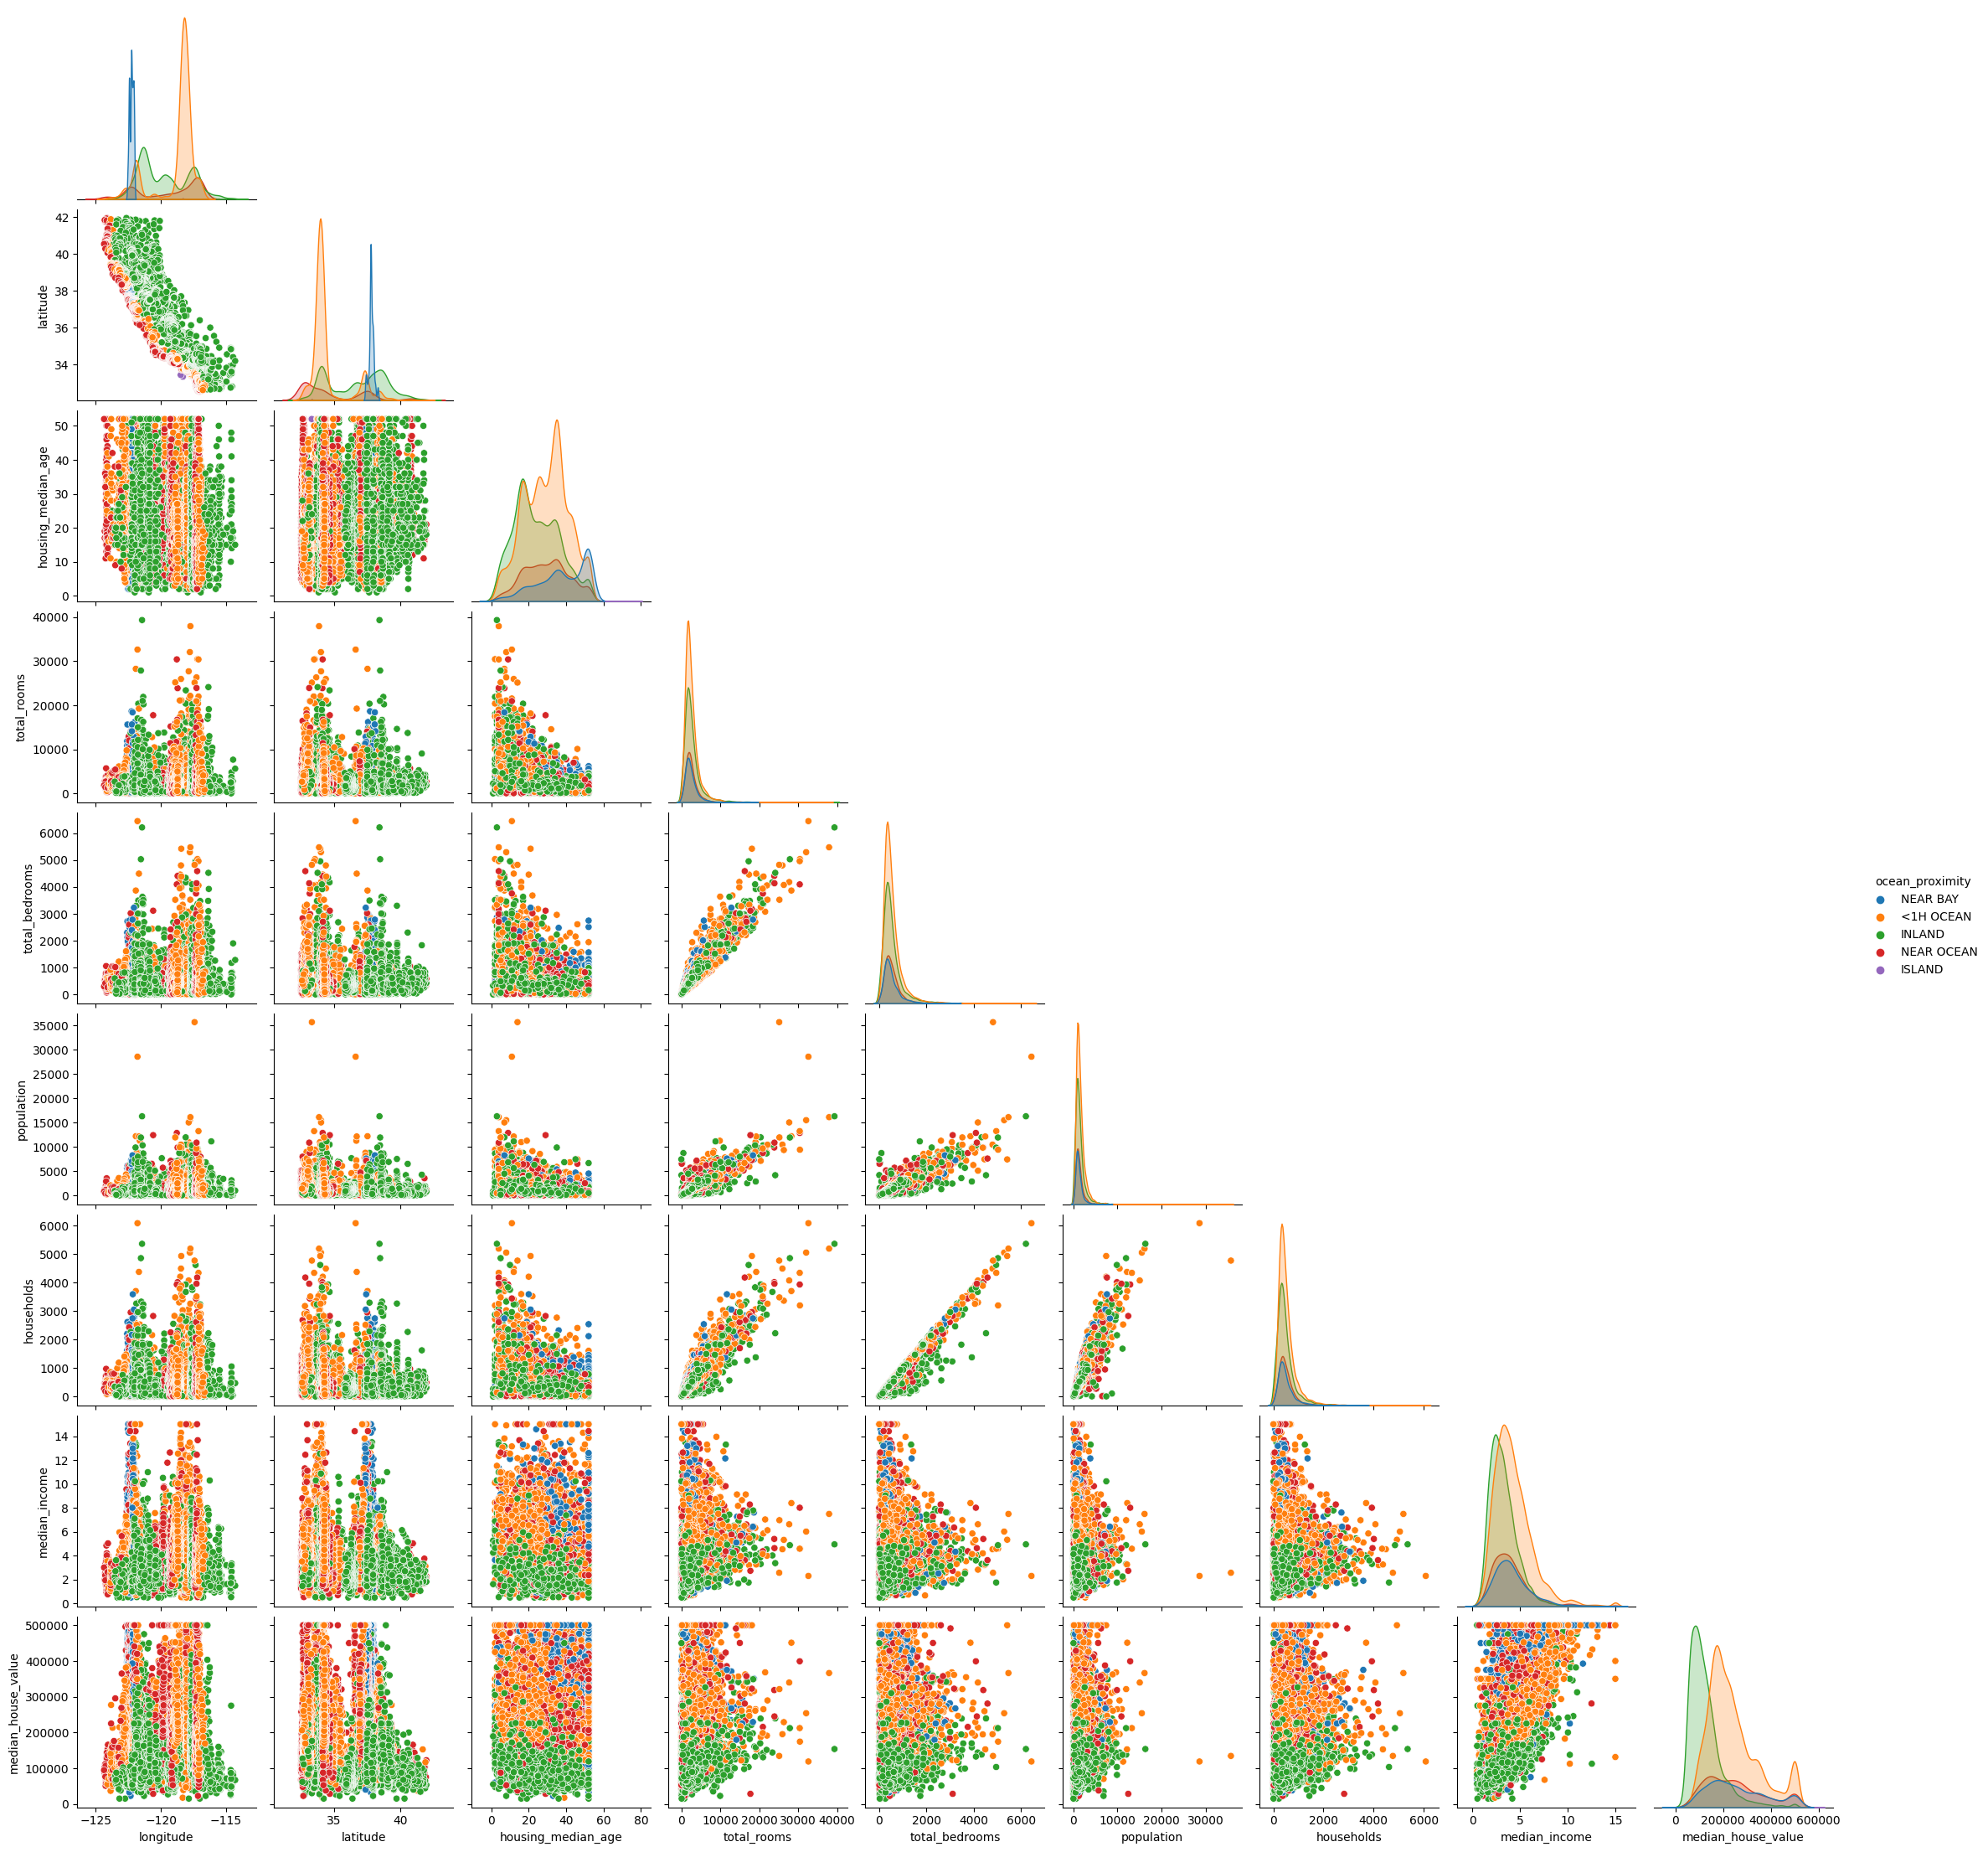

In [ ]:
# plotando as correlações
# olhando todas as features de uma só vez, consigo ver a distribuição de cada uma, assim como as relações entre pares.
sns.pairplot(houses_df, corner=True, hue='ocean_proximity')

Excluí do modelo algumas variáveis aparentemente muito correlacionadas, pois elas podem enviesar o modelo dando mais 'peso' para essas variáveis que estão correlacionadas.

In [ ]:
#Variáveis a serem utilizadas no modelo
houses_df = houses_df[['longitude',	'latitude',	'housing_median_age',	'total_rooms',	'total_bedrooms', 'median_income',	'median_house_value', 'ocean_proximity']]

##Pre-Prossessing

In [ ]:
#substituindo valores nulos
median = houses_df.total_bedrooms.median()
houses_df.total_bedrooms.fillna(median, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# Separando o que é atributo de o que é alvo
y = houses_df['ocean_proximity']
X = houses_df.drop('ocean_proximity', axis=1)

In [ ]:
#StandardScaler (Para padronizar os dados em escalas)
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [ ]:
#Dividindo os dados de Treino/Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Treinando os Modelos

Antes de mais nada, brinquei com a variação do tamanho que a árvore pode ter, afim de encontrar o tamanho que retorne uma boa acurácia, porém sem overfitting.

In [ ]:
#Árvore de Decisão - Testando o tamanho da árvore
lista = []
tamanho = []
for i in range(1,10):
  tree_model = DecisionTreeClassifier(max_depth=i)
  tree_model.fit(X_train, y_train)
  lista.append(tree_model.score(X_test, y_test))
  tamanho.append(i)

acur= pd.DataFrame(lista, columns = ['Acurácia'])
tam= pd.DataFrame(tamanho, columns = ['Tamanho'])
df_score = tam.join(acur)
df_score.sort_values('Acurácia', ascending=False)

,Tamanho,Acurácia
8,9,0.967377
7,8,0.961725
6,7,0.950420
5,6,0.921027
4,5,0.881460
3,4,0.833979
2,3,0.784238
1,2,0.684916
0,1,0.588824


Testei como ficaria o modelo utilizando o tamanho que trás a melhor acurácia, no range que selecionei.

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=9, min_samples_split=20, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=20, random_state=42)

Agora testando como se comporta o modelo com os cados de treino vs os de teste.
Sempre aumentando o número de dados de teste e verificando qual o tamanho seria ideal pra que não ocorra overfitting.

Mesmo que, nos testes o tamanho 9 retorne uma maior acurácia, é com o tamanho 8 que os dados de treino e teste se comportam melhor.

In [ ]:
#Acurácia do Modelo

from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = tree_model.predict(X_train)
y_test_true = y_test
y_test_pred = tree_model.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.97
Acurácia de Teste: 0.96


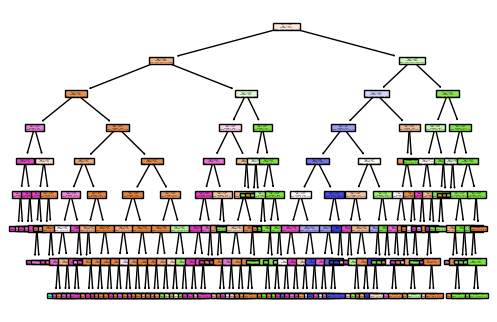

In [ ]:
#Plotando a árvore
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure()
plot_tree(tree_model, filled=True)
plt.show()